# Importing libraries

In [1]:
import requests 
from bs4 import BeautifulSoup as bs
url = 'https://www.pagina12.com.ar/'
from IPython.display import Image


# Getting home page

Does the first request, parses it and prints it.

In [2]:
try:
    p12 = requests.get(url)
    s = bs(p12.text,'lxml')
    print(s.prettify())
except Exception as e:
    print('Request Error')
    print(e)
    print('\n')


<!DOCTYPE html>
<html class="no-js">
 <head>
  <meta charset="utf-8"/>
  <title>
   Página12 | La otra mirada
  </title>
  <meta content="x6zSdT0DBcKDmridH4LpEVrCmxcOunR2dgBQVmuL6fg" name="google-site-verification"/>
  <script type="application/ld+json">
   {"@context": "http://schema.org","@type": "Organization","url": "https://www.pagina12.com.ar","logo": "https://www.pagina12.com.ar/assets/media/logo_default_p12.png"}
  </script>
  <meta content="Notas focalizadas en el quehacer político de la Argentina." name="description" property="description"/>
  <meta content="1541638399393436" name="fb:pages" property="fb:pages"/>
  <meta content="es_AR" name="og:locale" property="og:locale"/>
  <meta content="Página12 | La otra mirada" name="og:title" property="og:title"/>
  <meta content="PAGINA12" name="og:site_name" property="og:site_name"/>
  <meta content="website" name="og:type" property="og:type"/>
  <meta content="https://www.pagina12.com.ar" name="og:url" property="og:url"/>
  <meta 

# Getting news links

Gets the header sections

In [16]:
header_p12 = s.find('ul', attrs={'class': 'hot-sections'}).find_all('li')
s.find('ul', class_='hot-sections')

<ul class="hot-sections"><li class=""><a href="https://www.pagina12.com.ar/secciones/el-pais">El país</a></li><li class=""><a href="https://www.pagina12.com.ar/secciones/economia">Economía</a></li><li class="no-border"><a href="https://www.pagina12.com.ar/secciones/sociedad">Sociedad</a></li><li class="show-for-large"><a href="https://www.pagina12.com.ar/suplementos/cultura-y-espectaculos">Cultura y Espectáculos</a></li><li class="show-for-large"><a href="https://www.pagina12.com.ar/secciones/el-mundo">El mundo</a></li><li class="show-for-large"><a href="https://www.pagina12.com.ar/secciones/deportes">Deportes</a></li><li class="show-for-large"><a href="https://www.pagina12.com.ar/secciones/recordatorios">Recordatorios</a></li><li class="show-for-large"><a href="https://www.pagina12.com.ar/secciones/salta12">Salta12</a></li></ul>

For each section gets their link.

In [4]:
links_header = [section.a.get('href') for section in header_p12]
links_header

['https://www.pagina12.com.ar/secciones/el-pais',
 'https://www.pagina12.com.ar/secciones/economia',
 'https://www.pagina12.com.ar/secciones/sociedad',
 'https://www.pagina12.com.ar/suplementos/cultura-y-espectaculos',
 'https://www.pagina12.com.ar/secciones/el-mundo',
 'https://www.pagina12.com.ar/secciones/deportes',
 'https://www.pagina12.com.ar/secciones/recordatorios',
 'https://www.pagina12.com.ar/secciones/salta12']

Does a request to each link in the list and parse them

In [5]:
    sections = [requests.get(section) for section in links_header]

In [6]:
s_sections = [bs(section.text,'lxml') for section in sections]

Prints the first section

In [7]:
print(s_sections[1].prettify())

<!DOCTYPE html>
<html class="no-js">
 <head>
  <meta charset="utf-8"/>
  <title>
   Economía | Página12
  </title>
  <link href="https://www.pagina12.com.ar/secciones/economia" rel="canonical"/>
  <script type="application/ld+json">
   {"@context": "http://schema.org","@type": "Organization","url": "https://www.pagina12.com.ar","logo": "https://www.pagina12.com.ar/assets/media/logo_default_p12.png"}
  </script>
  <meta content="La economía de la Argentina y el mundo desde la crítica a la lógica dominante.
" name="description" property="description"/>
  <meta content="1541638399393436" name="fb:pages" property="fb:pages"/>
  <meta content="es_AR" name="og:locale" property="og:locale"/>
  <meta content="Economía | Página12" name="og:title" property="og:title"/>
  <meta content="PAGINA12" name="og:site_name" property="og:site_name"/>
  <meta content="website" name="og:type" property="og:type"/>
  <meta content="https://www.pagina12.com.ar/secciones/economia" name="og:url" property="og:url

Creates a function that receives an bs object of a section and returs all the news links

In [8]:
def get_links(section):
    #Gets the featured article link
    try:
        featured_article = section.find('div', attrs={'class': 'featured-article__container'}).a 
        featured_article_link = featured_article.get('href')
    except:
        print('No class: featured-article__container')
    #Gets rest of the links
    articles_list = section.find('ul', attrs={'class':'article-list'})
    links = [li.a.get('href') for li in articles_list if li.a is not None]
    try:
        links.insert(0,featured_article_link)
    except:
        pass
    return links

In [9]:
# featured_article = s_sections[0].find('div', attrs={'class': 'featured-article__container'}).a
# featured_article_link = featured_article.get('href')
# featured_article_text = featured_article.get_text()
# articles_list = s_sections[0].find('ul', attrs={'class':'article-list'})
# articles_list.find_all('li')
# links = [li.a.get('href') for li in articles_list if li.a is not None]


In [10]:
links = get_links(s_sections[0])

# Extracting basic data

In [11]:
try:
    url_new = links[0]
    new_request = requests.get(url_new)
    if new_request.status_code == 200:
        s_new = bs(new_request.text, 'lxml')

        #Extracting title, date, summary, prefix, body and author
        title_new = s_new.find('h1', attrs = {'class': 'article-title'}).get_text()
        date_new = s_new.find('span', attrs = {'pubdate': 'pubdate'}).get('datetime')
        summary_new = s_new.find('div', attrs = {'class':'article-summary'}).get_text()
        prefix_new = s_new.find('h2', attrs = {'class' : 'article-prefix'}).get_text()
        body_new = s_new.find('div', attrs = {'class' : 'article-text'})
        try:
            author_new = s_new.find('div', attrs = {'class', 'article-author'}).find('a').get_text()
        except:
            author_new = 'Anonymus'
    else:
        print(f'Status: {new_request.status_code}')
        
except Exception as e:
    print(f'Error \n${e}\n')
    

In [12]:
# print(title_new)
# print(date_new)
# print(summary_new)
# print(prefix_new)
# print(body_new)
# print(author_new)

# Extracting Media

In [13]:
media = s_new.find('div', attrs = {'class':'article-main-media-image'}).find_all('img')
if len(media) == 0:
    print('images ot found')
else:
    main_image_new = media[-1].get('data-src')
    img_request = requests.get(main_image_new)

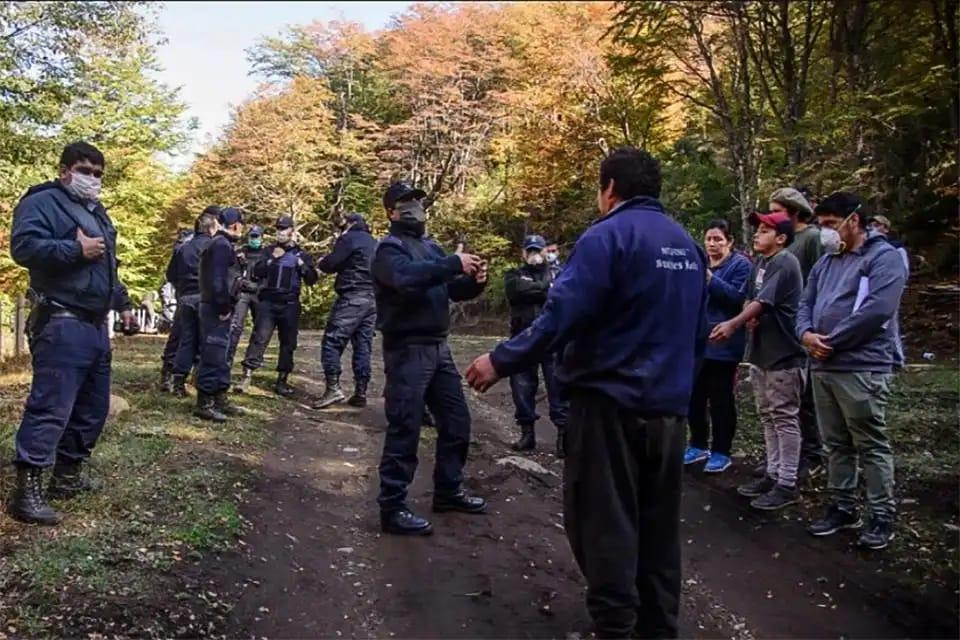

In [14]:
Image(img_request.content)